In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('googleplaystore.csv')

In [45]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [ ]:
## al final, borro la columna Current Ver
##def split_version(ver):
##if ver == 'Varies with device':
 ##      return 0
 ##   try:
 ##       vers = ver.split('.')
 ##       #return f'{vers[0]}.{vers[1]}'
 ##       return vers[0]
 ##   except:
 ##       return ver

In [46]:
def clean_df(df):
    ##drop columnas
    df.drop(columns=['Unnamed: 0', 'Current Ver', 'Android Ver', 'Size'], inplace=True, axis=1)
    # borrar los valores raros 1.9 
    df = df[df.Category!='1.9']
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.Category = df.Category.map(lambda x: x.lower())
    
    # convertir el tipo Reviews a int
    df.Reviews = df.Reviews.map(lambda x: int(x))
    df.Installs = df.Installs.map(lambda x: int(x.replace('+', '').replace(',', '')))
    df.Price = df.Price.map(lambda x: float(x.replace('$', '')))
    genres = []
    for val in df['Genres']:
        val.replace(',', ';')
        split_vals = []
        split_vals.append(val.split(';'))
        genres.append(split_vals[0])
    col1 = []
    col2 = []
    for val in genres:
        col1.append(val[0])
    for val in genres:
        try:
            col2.append(val[1])
        except:
            col2.append('N/A')
    df['Genres'] = col1
    df['Genres2'] = col2
    df['Last Updated'] = df['Last Updated'].map(lambda x: x[-6:])
    return df

In [35]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [10]:
df.Reviews = df.Reviews.map(lambda x: int(x))

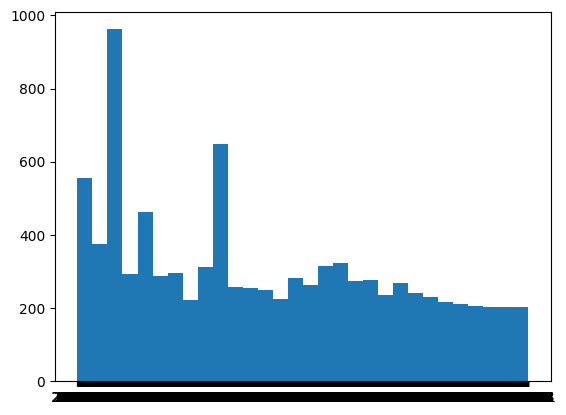

In [36]:
plt.hist(df.Reviews, bins=30);

In [15]:
#df.Size.unique()
# replace m con 00

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
#df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [17]:
#df.Installs.map(lambda x: x.replace('+', '').replace(',', ''))

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [18]:
#df.Type.value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

In [37]:
#df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [ ]:
#current_vers = df['Current Ver'].value_counts().reset_index()

In [ ]:
#current_vers.tail(20)

,Current Ver,count
2763,1.7.110758,1
2764,7.1.8,1
2765,2.35.8,1
2766,2.2.3.3,1
2767,3.2.8,1
2768,4.1.07,1
2769,8.3.4,1
2770,27500000,1
2771,0.9.10.f96,1
2772,0.19.13-SPECTRUM,1


In [20]:
##def split_version(ver):
    ##try:
   ##     vers = ver.split('.')
       ## return f'{vers[0]}.{vers[1]}'
  ## except:
      ## return ver

In [21]:
#testlist = df['Current Ver'].map(lambda x: split_version(x))

In [23]:
#df['Last Updated']

0         7-Jan-18
1        15-Jan-18
2         1-Aug-18
3         8-Jun-18
4        20-Jun-18
           ...    
10836    25-Jul-17
10837     6-Jul-18
10838    20-Jan-17
10839    19-Jan-15
10840    25-Jul-18
Name: Last Updated, Length: 10840, dtype: object

In [ ]:
##df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [24]:
##df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [25]:
##df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [26]:
##vals = []
##for val in df['Genres']:
 ##   val.replace(',', ';')
 ##   split_vals = []
  ##  split_vals.append(val.split(';'))
  ##  vals.append(split_vals[0])

In [27]:
##col1 = []
##col2 = []
##for val in vals:
  ##  col1.append(val[0])
  ##  try:
 ##       col2.append(val[1])
 ##   except:
 ##       col2.append('N/A')

In [28]:
##col1

['Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Art & Design',
 'Auto & Vehicles',
 'Auto & Vehicles',
 'Auto & Vehicles',
 'Auto & Vehicles',
 'Auto & Vehicles',
 'Auto & Vehicles',
 'Auto & Vehicles',
 'Auto & Vehicles',
 'Auto 

In [29]:
##df['Last Updated'].map(lambda x: x[-6:])

0        Jan-18
1        Jan-18
2        Aug-18
3        Jun-18
4        Jun-18
          ...  
10836    Jul-17
10837    Jul-18
10838    Jan-17
10839    Jan-15
10840    Jul-18
Name: Last Updated, Length: 10840, dtype: object

In [47]:
df_clean = clean_df(df)

In [48]:
df_clean.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Genres2
6739,CM Launcher Default Theme,personalization,4.5,3989,100000,Free,0.00,Everyone,Personalization,Sep-15,N/A
39,Drawing Clothes Fashion Ideas,art_and_design,4.2,117,10000,Free,0.00,Everyone,Art & Design,Jul-18,N/A
7954,Deaf World DW,communication,4.3,298,10000,Free,0.00,Teen,Communication,Nov-17,N/A
7048,CU SoCal Mobile Banking,finance,4.0,253,10000,Free,0.00,Everyone,Finance,May-18,N/A
4549,X-VPN - Free Unlimited VPN Proxy,tools,4.5,40617,5000000,Free,0.00,Everyone,Tools,Jul-18,N/A
3893,Koi Live Wallpaper,personalization,4.6,14026,100000,Paid,0.99,Everyone,Personalization,Jun-14,N/A
8695,ChargeHub - Find EV & Tesla Charging Stations,maps_and_navigation,4.6,796,50000,Free,0.00,Everyone,Maps & Navigation,May-18,N/A
2030,Monster Truck Driver & Racing,family,4.4,765,1000000,Free,0.00,Everyone,Education,Jan-17,Action & Adventure
4456,"See U - Random video chat, video chat",social,4.1,568,100000,Free,0.00,Mature 17+,Social,Apr-18,N/A
4474,Pocket U ASW,family,3.9,93,10000,Free,0.00,Everyone,Education,Jul-18,N/A


In [52]:
df_clean['Rating'].dtype

dtype('float64')

In [55]:
df_clean['Category'].unique()

array(['art_and_design', 'auto_and_vehicles', 'beauty',
       'books_and_reference', 'business', 'comics', 'communication',
       'dating', 'education', 'entertainment', 'events', 'finance',
       'food_and_drink', 'health_and_fitness', 'house_and_home',
       'libraries_and_demo', 'lifestyle', 'game', 'family', 'medical',
       'social', 'shopping', 'photography', 'sports', 'travel_and_local',
       'tools', 'personalization', 'productivity', 'parenting', 'weather',
       'video_players', 'news_and_magazines', 'maps_and_navigation'],
      dtype=object)

In [56]:
df_clean.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Genres2
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,10000,Free,0.0,Everyone,Art & Design,Jan-18,N/A
1,Coloring book moana,art_and_design,3.9,967,500000,Free,0.0,Everyone,Art & Design,Jan-18,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,Aug-18,N/A
3,Sketch - Draw & Paint,art_and_design,4.5,215644,50000000,Free,0.0,Teen,Art & Design,Jun-18,N/A
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,100000,Free,0.0,Everyone,Art & Design,Jun-18,Creativity


In [57]:
df_clean = df_clean.to_csv('clean.csv', index=False)